# Project - Machine Learning 

# Introduction: 

This project is part of the Udacity Data Analyst Nanodegree coursework. To conclude the Machine Learning course, we had to write a program that tests different algorithms and chose the best one to predict behavior among a corpus of emails from Enron. Below is the write-up for questions asked, observations, and methodology. 


** 1) Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. **

### Background
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. 

### Objective

The objective for this project is to see if we could have/can use machine learning to find interesting patterns of behaviors through Enron's emails. By 

- preparing the data 
- exploring its features 
- running different algorithms 
- comparing the algorithms 
- choosing an algorithm
- testing the algorithm 
- summarizing the results from the test

we can use proper Machine Learning methodology to see patterns. In particular, we aim to find People of Interest that were eventually found guilty of fraud. 





**Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]** 


Below is an illustration of a scatterplot of an individual's sallary on the x-axis and bonus on the y-axis. Based on this visualization, it is clear that there is a single value that is remarkably different from the other. By understanding the data set, it can be gleamed that this value is a 'Total' value that was used to sum all the data inputs from our file. However, since if doesn't represent any one individual, it is not useful for this analysis and only distorts any meaning in this methodology.  

**Outliers**

![Figure_1.png](images/Figure_1.png)



To get rid of this value for future testing, I used the following line to remove the outlier.

```
data_dict.pop('TOTAL', 0)
```

** 2) What features did you end up using in your POI identifier, and what selection process did you use to pick them? **  

Based on my test of all algorithms (poi_id_testing_all_algos.py) the following features were regularly selected as the best features to be included for each model. 

*Best features selected with respective scores:*

- salary 19.025
- bonus 30.076
- total_stock_value 15.964
- exercised_stock_options 15.823
- fraction_to_poi 15.716


**Note:**  the fraction feature was created separately as fractions of other features

The process by which I selected these features was to use the MinMaxScaler and SelectKBest tools. Both were placed into the pipeline function and the SeleckKBest tool had parameters that accounted for how many features I would like to iterate towards and stop at. I set the parameters initially to 


```
    params = {
            'SKB__k' : [2,3,4,5,6,7,8],
            'SKB__score_func' : [f_classif]
            }

```

This allowed me to get the best features amongst the longer list of the following features. 

*Features List:*

- 'poi', 
- 'salary', 
- 'deferral_payments', 
- 'total_payments', 
- 'loan_advances', 
- 'bonus', 
- 'restricted_stock_deferred', 
- 'deferred_income', 
- 'total_stock_value', 
- 'expenses', 
- 'exercised_stock_options', 
- 'other', 
- 'long_term_incentive', 
- 'restricted_stock', 
- 'director_fees', 
- 'fraction_salary_total_payments', 
- 'to_messages', 
- 'from_poi_to_this_person', 
- 'from_messages', 
- 'from_this_person_to_poi', 
- 'shared_receipt_with_poi', 
- 'fraction_from_poi', 
- 'fraction_to_poi'


**Did you have to do any scaling? Why or why not?**

Yes, the MinMaxScaler was useful to scale. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005] for the transformed number of households.

This tool is sensitive to outliers as the plot below shows the data with the outlier on the left and scaled out of the range on the right. 

![sphx_glr_plot_all_scaling_003.png](images/sphx_glr_plot_all_scaling_003.png)

*image from http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py* 

**As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.)**

This is a good idea and I added this for features that were stated in absolute terms. For this dataset, a little intuition goes a long way to show that the monetary values for the Enron employees are of relative importance. For example, a 500k USD bonus may be very significant for some employees (say if your base salary is 90k/year), but may be more trivial for higher paid employees that may have a salary of more than $1 million. To normalize these values, features that are based of fractions help.  

I set up following code as a function. This could then be applied to any two features to create a new one as a fraction. 

```
def compute_fraction( numerator, denominator):
    if numerator == 'NaN' or denominator == 'NaN':
        fraction = 0
    else:
        fraction = float(numerator)/float(denominator)
    return round(fraction, 2)


def add_fraction_to_dict(dict, numerator, denominator, new_variable_name):
    num = dict[numerator]
    den = dict[denominator]
    fraction = compute_fraction(num, den)
    dict[new_variable_name] = fraction
    return dict

my_dateset = data_dict
```

with these functions, I then chose 3 features to add fractions to. 
- inbound POI email 
- outbound POI email
- salary as fraction of Total Payments


** In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]** 

For the standard decision tree algorithm, I used the following parameters: 

```
elif algorithm == 'Standard_Decision_Tree':
        cl = tree.DecisionTreeClassifier()
        cl_params = { algorithm + '__min_samples_split' : [2] }
```

The parameters are default in regards to 

```
'__min_samples_split'
```

being the minimum amount of branches a tree can split at each level. 
I also tried these parameters use the cascading values for [30, 40, 50]. This finetuning brought down the features used from 11 to 9, but also brought down both precision and recall from [0.41 0.21] to [0.40 0.17]. As a result I reverted to the default. 

This amount of features, however, was optimized by the program Select K Features. For every change in the algorithm, Select K Best fits the # of features to get the best scores.  

Select K Best was used across the board to adjust all algorithms. I discuss below about how I used it for all the algorithms. 

** 3) What algorithm did you end up using? ** 

The Naive Bayes algorithm. 

**What other one(s) did you try?**

When compared with the others (SVC, Standard_Decision_Tree, K_Nearest_Neighbors, Random_Forest, & LinearDiscriminantAnalysis), Naive Bayes had the highest and valanced scores across the algorithms. 

To do this, I had to finetune the parameters a fair amount so I could meet the threshold of 0.3 for both precision and recall. With my iniitial parameters, my recall values were 0.21 at most. 

After making the following changes to the parameters to my SelectKBest

```
params = {
                #'PCA__n_components': [2],
                'SKB__k' : [4,5, 6, 7, 8,9],
                'SKB__score_func' : [f_classif]
             }
```

I got the following comparision amongst algorithms. 

```
ALGORITHM                  ACCU PREC RECA
Naive_Bayes                0.84 0.37 0.28
SVC                        0.86 0.40 0.09
Standard_Decision_Tree     0.83 0.15 0.05
K_Nearest_Neighbors        0.86 0.05 0.00
Random_Forest              0.86 0.44 0.21
LinearDiscriminantAnalysis 0.86 0.42 0.21
```

This didn't do the trick and I finetuned the parameters a handful of times. Finally, I agreed upon the following parameters: 

```
params = {
                #'PCA__n_components': [2],
                'SKB__k' : [8,9,10,11, 12],
                'SKB__score_func' : [f_classif]
             }
```

With these results, I was content to get meet the threshold for both Precision and Recall with the Naive_Bayes algorithm. See below: 

```
ALGORITHM                      ACCU PREC RECA
----Naive_Bayes                0.85 0.42 0.31----
    SVC                        0.86 0.37 0.06
    Standard_Decision_Tree     0.84 0.12 0.03
    K_Nearest_Neighbors        0.86 0.03 0.00
    Random_Forest              0.86 0.41 0.21
    LinearDiscriminantAnalysis 0.85 0.41 0.24
```



**How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]**

A summary of performance for the algorithms against each other are above. However, that is not the end of the story as I printed detailed  performance for each algorithm. 

Amongst the remaining algorithms, I got the following results for each algorithm: 

```
Naive_Bayes performance report:
             precision    recall  f1-score   support

        0.0       0.96      0.93      0.94        27
        1.0       0.33      0.50      0.40         2

avg / total       0.92      0.90      0.91        29
```


```
SVC performance report:
             precision    recall  f1-score   support

        0.0       0.93      0.96      0.95        27
        1.0       0.00      0.00      0.00         2

avg / total       0.86      0.90      0.88        29

```

```
Standard_Decision_Tree performance report:
             precision    recall  f1-score   support

        0.0       0.92      0.89      0.91        27
        1.0       0.00      0.00      0.00         2

avg / total       0.86      0.83      0.84        29
```


```
K_Nearest_Neighbors performance report:
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96        27
        1.0       0.00      0.00      0.00         2

avg / total       0.87      0.93      0.90        29

```


```
Random_Forest performance report:
             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93        27
        1.0       0.00      0.00      0.00         2

avg / total       0.86      0.86      0.86        29
```


```
LinearDiscriminantAnalysis performance report:
             precision    recall  f1-score   support

        0.0       0.93      0.96      0.95        27
        1.0       0.00      0.00      0.00         2

avg / total       0.86      0.90      0.88        29

```

These results highlight why the Naive Bayes algorithm would be the only one that reaches the threshold. The precision and recall for positively identifying the poi is the key differentiator. 

**4) What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  ***


Tuning the parameters is adjusting the parameters to getting optimal performance. The user can adjust in several ways, but I used GridSearchCV which does this automatically. 

If you don't adjust the parameters well enough, your model may not be learning as well it is designed to do so. 

**How did you tune the parameters of your particular algorithm?**



When discussing the Standard Tree Decision algorithm above, I disucss how I adjsuted the parameters to the minimum samples split. I also used it for the Random Forest. 


I used the example of By changing individual algorithms for such parameters to  

```
'__max_features' : ['sqrt', 'log2']
'__n_estimators' : [2, 5, 7, 10, 15]
```
for Random Forest. 

The max_features alters the number of features so that you can use mathematically operated on values. The square root parameter is a standard tuning and also referred to as "auto". The log2 is also relevant to see if it could get a better score. 

The n_estimators simply states how many trees would be in the forest for the test designed. 

**What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]**


As discussed above, the Standard Decision Tree and the Random Forest were algorithms that I tuned. 

As for the Naive Bayes algorithm, it is considered to have over-simplified assumptions and doesn't have parameters to tune relevant to this dataset. What is distinct to this model is that Naive Bayes does famously well for document classification and spam filtering. 

**5) What is validation, and what’s a classic mistake you can make if you do it wrong?   [relevant rubric items: “discuss validation”, “validation strategy”]**

Validation is the process of splitting up the data into two sets: 
- training
- testing

By bifurcating the dataset into 2 sets (usually into halves), the model will have the opportunity to learn from a subset of the data and then apply those lessons to a completely new dataset to see if the learning was effective. 

This strategy of choosing how to split the data reveals the trade off that comes with choosing too much of either training or testing. For example, if you choose too much training data, you seek to maximize the learning at the expense of not being able to test it sufficiently. Conversely, choosing too much testing data means you are testing a model that may not have had sufficient data to learn from. 



**How did you validate your analysis?**


Stratified ShuffleSplit cross validation. 

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

I am most familar with the k-fold approach which divides the dataset in to k - n amount of bins. These bins are then used for individual training/testing subsetting. After this is done for a couple of bins, you optimize the splitting of data based on the average of subsetting in additional bins.

We get the following visual from Udacity. 
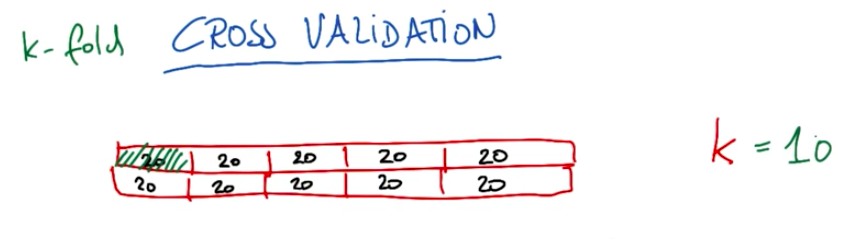

**6) Give at least 2 evaluation metrics and your average performance for each of them.** 

The two used as criterion for this project and often used as a foundation for evaluation are precision and recall. 


**Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]**

The easiest way for me to describe precision and recall are as: 
- Precision is the quotient of an affirmative prediction of an event being correct. High values means the model makes few mistakes when it affirmatively makes a prediction.  

- Recall  is the product of have an event being correctly predicted. High values means the model is good at finding the selected target amongst others. 



Within the Confusion Matrices, you can put the 4 different outcomes based on what is predicted to be correct and what is actually correct as follows: 

1. True positives
2. False positives
3. True negatives
4. False negatives 



\begin{equation*}
precision= \frac{true positives}{true positives + false positives}
\end{equation*}

\begin{equation*}
recall= \frac{true positives}{true positives + false negatives}
\end{equation*}


### Conclusion: 

This dataset has become well documented over time and is a popular one for training document classification. The data prep, model design, and model testing were good practice of how machine learning is used in practice. 

The Enron use case is applicale to real life and a good primer to future ML models I write. 


### References: 



** Other projects: **
I referenced the following projects a great deal as I wrote the scripts.  

- https://github.com/dksmith01/Enron-Email-Analysis
- https://github.com/davidventuri/udacity-dand/blob/master/p5/report.md
- https://github.com/cole-maclean/Udacity-DSNDP5


They were helpful for a lot of reasons, but I had to update a handful of parts to make up to date. Some include: 

- Updating the LDA algorithm to the LinearDiscriminantAnalysis documentation
- Finetuning the Adaboost algorithm to compute properly
- Adjusting for different algorithm performance 

**Other resources/documentation: **

- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
- http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
- http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
- http://scikit-learn.org/stable/modules/tree.html
- http://scikit-learn.org/stable/modules/naive_bayes.html
- http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/
- https://github.com/scikit-learn/scikit-learn/issues/8399